# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [49]:
# if plotnine is not installed in Jupter then use the following command to install it 
!pip install plotnine --user

Running this project require the following imports 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [2]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



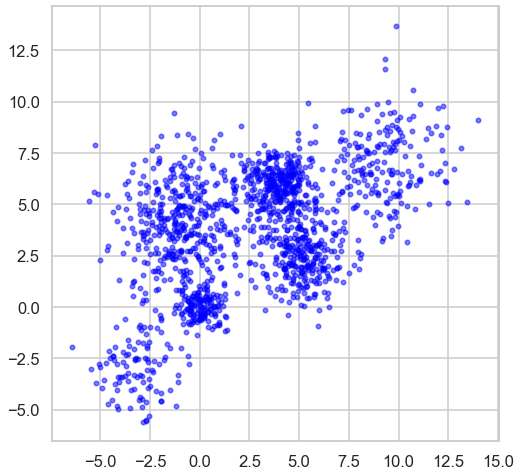

In [3]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

# Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

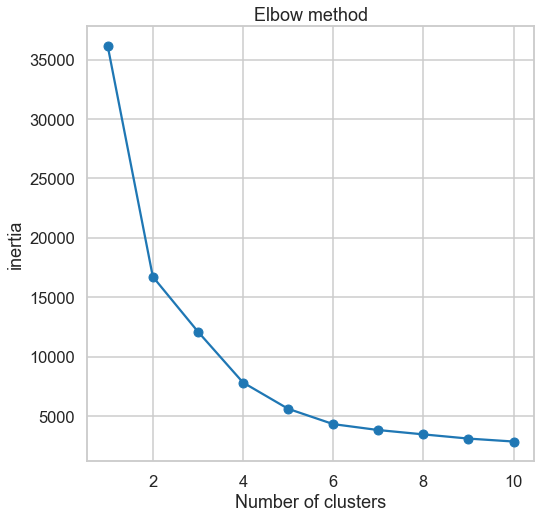

In [12]:
#This represents the elbow method, which is a method used to find the optimum number of clusters. As seen in the inertia graph, the optimum number of clusters is K=2. 
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(Multi_blob_Data)
    inertias.append(kmeans.inertia_)
    cluster_labels = kmeans.labels_

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()


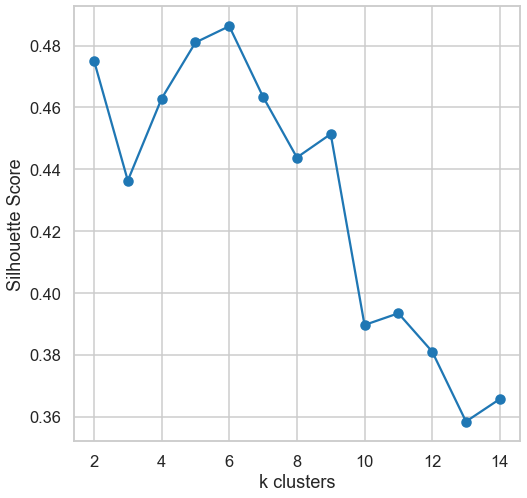

In [67]:
#this represents the silhouette method 
# silhouette score
def silhouette(Multi_blob_Data):
    silhouette_score1 = []
    clusters = list(range(2,15))
    for num_clusters in clusters:
        kmeans = KMeans(n_clusters=num_clusters)
        cluster= kmeans.fit(Multi_blob_Data)
        silhouette_score1.append(silhouette_score(Multi_blob_Data,kmeans.labels_,metric='euclidean'))

    plt.plot(clusters,silhouette_score1)
    plt.scatter(clusters,silhouette_score1)
    plt.xlabel('k clusters')
    plt.ylabel('Silhouette Score')
    
silhouette(Multi_blob_Data)

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

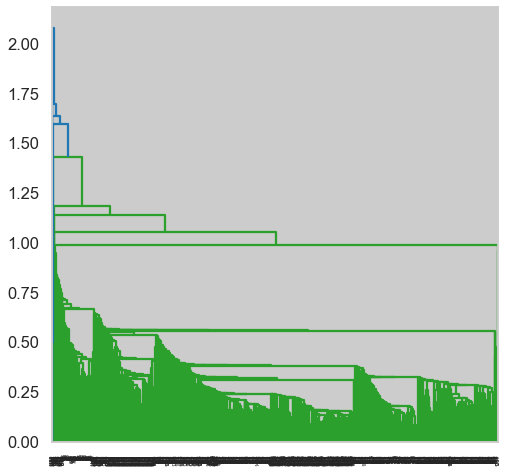

silhouette_score_euclidean=0.08705564851389591


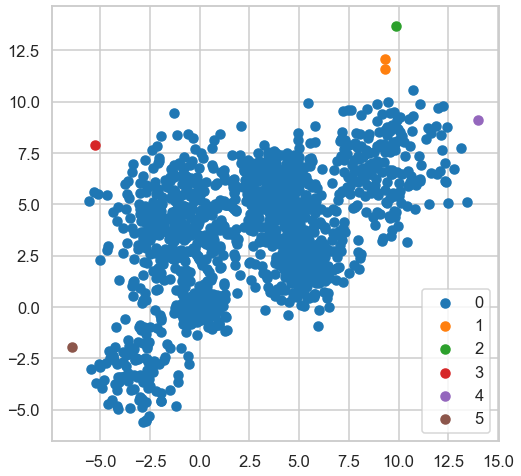

In [4]:
#metric=euclidean

model = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='single')
model.fit(Multi_blob_Data)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(Multi_blob_Data, method='single'))
plt.show()
score = silhouette_score(Multi_blob_Data,model.labels_,metric='euclidean')
print(f'silhouette_score_euclidean={score}')
u_labels = np.unique(model.labels_)
for i in u_labels:
    plt.scatter(Multi_blob_Data[model.labels_ == i , 0] , Multi_blob_Data[model.labels_ == i , 1] , label = i)
plt.legend()
plt.show()


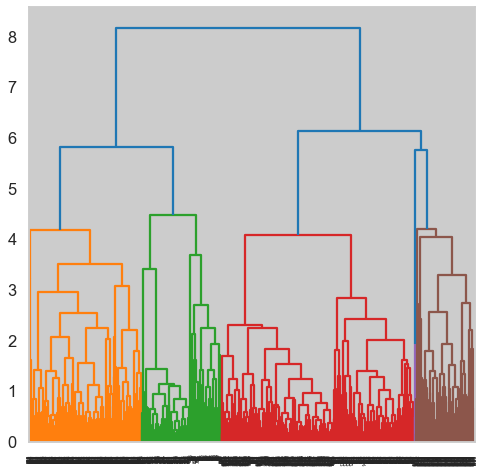

silhouette_score_euclidean=0.41478815574933364


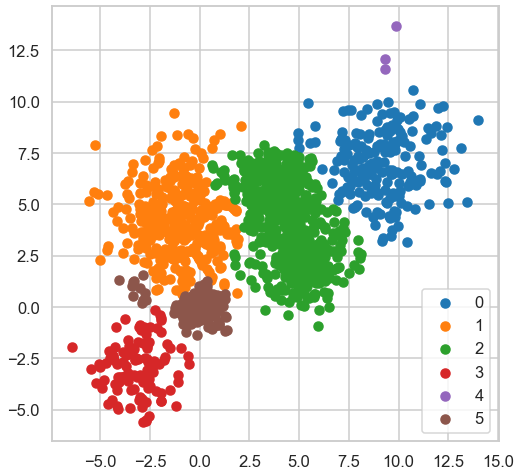

In [5]:
model = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='average')
model.fit(Multi_blob_Data)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(Multi_blob_Data, method='average'))
plt.show()
score = silhouette_score(Multi_blob_Data,model.labels_,metric='euclidean')
print(f'silhouette_score_euclidean={score}')

u_labels = np.unique(model.labels_)
for i in u_labels:
    plt.scatter(Multi_blob_Data[model.labels_ == i , 0] , Multi_blob_Data[model.labels_ == i , 1] , label = i)
plt.legend()
plt.show()


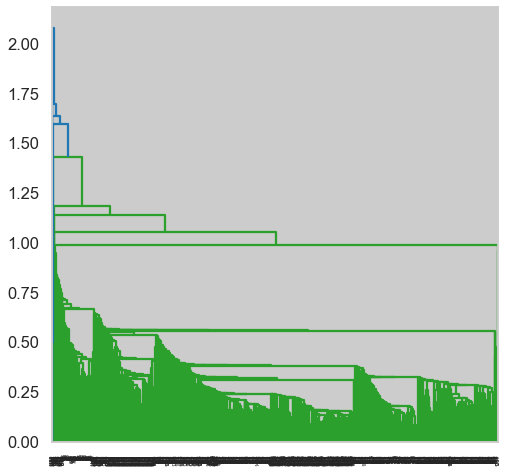

silhouette_score_euclidean=0.45996390896720124


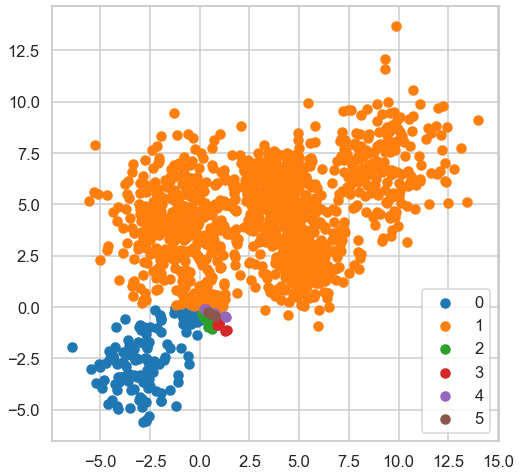

In [6]:
#method=cosine


model = AgglomerativeClustering(n_clusters=6, affinity='cosine', linkage='single')
model.fit(Multi_blob_Data)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(Multi_blob_Data, method='single'))
plt.show()
score = silhouette_score(Multi_blob_Data,model.labels_,metric='cosine')
print(f'silhouette_score_cosine={score}')

u_labels = np.unique(model.labels_)
for i in u_labels:
    plt.scatter(Multi_blob_Data[model.labels_ == i , 0] , Multi_blob_Data[model.labels_ == i , 1] , label = i)
plt.legend()
plt.show()


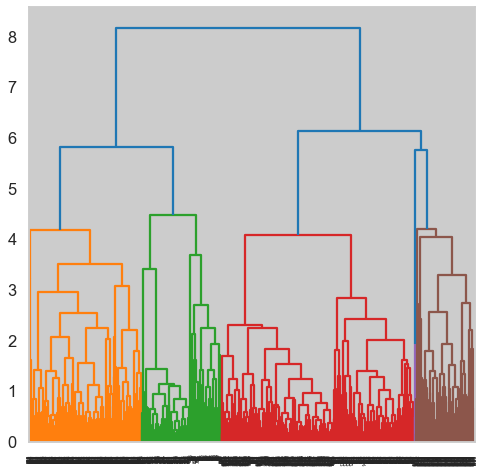

silhouette_score_euclidean=0.6719855302824832


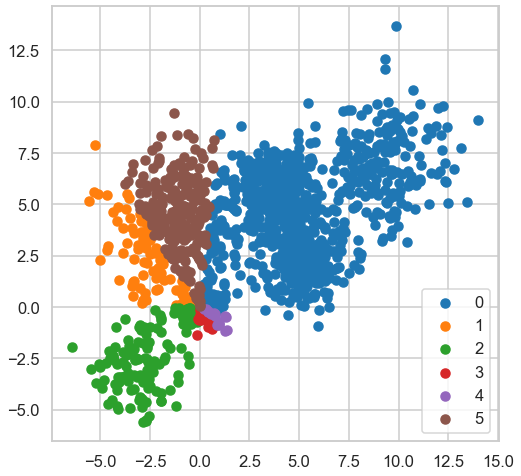

In [7]:
model = AgglomerativeClustering(n_clusters=6, affinity='cosine', linkage='average')
model.fit(Multi_blob_Data)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(Multi_blob_Data, method='average'))
plt.show()
score = silhouette_score(Multi_blob_Data,model.labels_,metric='cosine')
print(f'silhouette_score_cosine={score}')

u_labels = np.unique(model.labels_)
for i in u_labels:
    plt.scatter(Multi_blob_Data[model.labels_ == i , 0] , Multi_blob_Data[model.labels_ == i , 1] , label = i)
plt.legend()
plt.show()


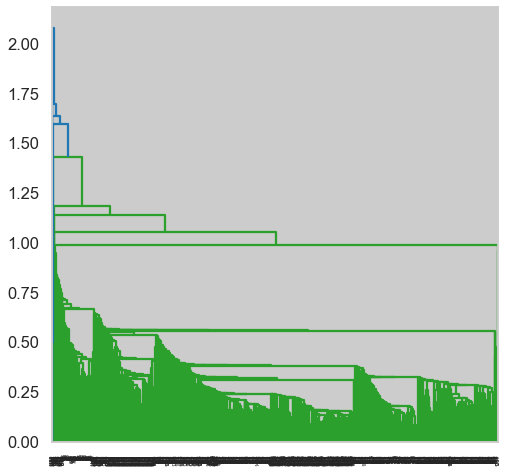

silhouette_score_euclidean=0.09516619170776609


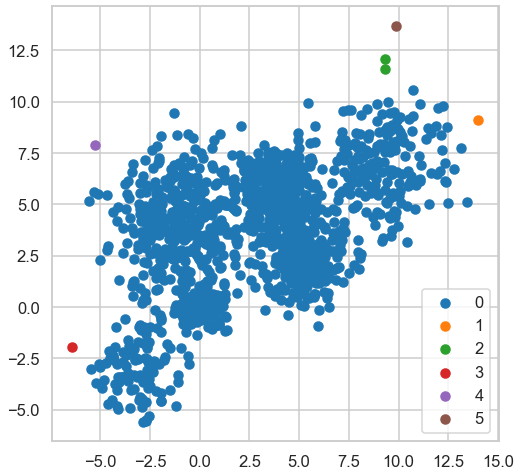

In [8]:
#manhattan method
model = AgglomerativeClustering(n_clusters=6, affinity='manhattan', linkage='single')
model.fit(Multi_blob_Data)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(Multi_blob_Data, method='single'))
plt.show()
score = silhouette_score(Multi_blob_Data,model.labels_,metric='manhattan')
print(f'silhouette_score_manhattan={score}')

u_labels = np.unique(model.labels_)
for i in u_labels:
    plt.scatter(Multi_blob_Data[model.labels_ == i , 0] , Multi_blob_Data[model.labels_ == i , 1] , label = i)
plt.legend()
plt.show()


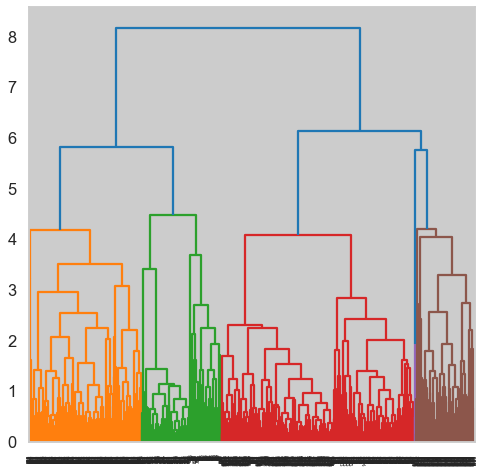

silhouette_score_euclidean=0.39128830534744086


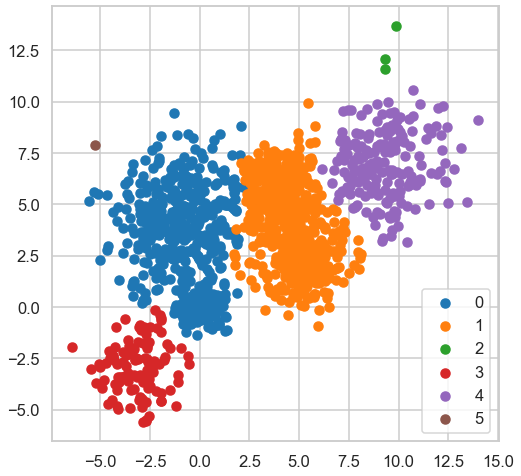

In [9]:
model = AgglomerativeClustering(n_clusters=6, affinity='manhattan', linkage='average')
model.fit(Multi_blob_Data)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(Multi_blob_Data, method='average'))
plt.show()
score = silhouette_score(Multi_blob_Data,model.labels_,metric='manhattan')
print(f'silhouette_score_manhattan={score}')

u_labels = np.unique(model.labels_)
for i in u_labels:
    plt.scatter(Multi_blob_Data[model.labels_ == i , 0] , Multi_blob_Data[model.labels_ == i , 1] , label = i)
plt.legend()
plt.show()


### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

In [42]:
from sklearn.cluster import DBSCAN
import numpy as np

db = DBSCAN(eps=0.7, min_samples=15)
dbscan=db.fit_predict(Multi_blob_Data)
np.unique(dbscan)

array([-1,  0,  1,  2,  3])

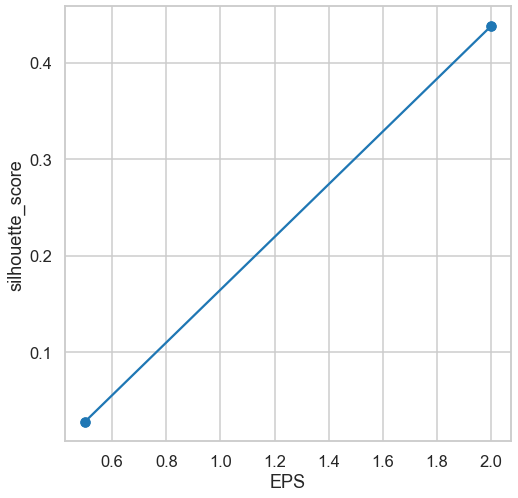

In [43]:
#dbscan
score=[] 
score1=[]
epsfinal=[]
samplesfinal=[]
eps = [0.1, 0.5, 2, 2.7, 3]
min_samples=[5, 10, 15, 20, 25]
for i in eps:
    db = DBSCAN(eps=i, min_samples=15)
    dbscan=db.fit_predict(Multi_blob_Data)
    if(len(np.unique(db.labels_))>1):
        score.append(silhouette_score(Multi_blob_Data,dbscan,metric='euclidean'))
        epsfinal.append(i)
       
    
plt.plot(epsfinal,score, marker='o')
plt.scatter(epsfinal,score)
plt.xlabel('EPS')
plt.ylabel('silhouette_score')
plt.show()

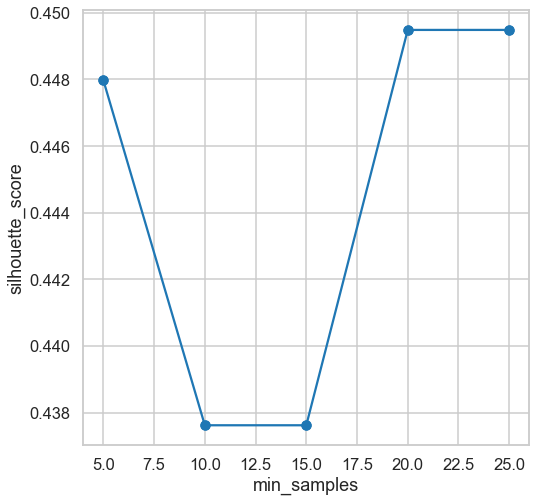

In [24]:
for j in min_samples:
    db = DBSCAN(eps=2, min_samples=j)
    dbscan=db.fit_predict(Multi_blob_Data)
    if(len(np.unique(db.labels_))>1):
        score1.append(silhouette_score(Multi_blob_Data,dbscan,metric='euclidean'))
        samplesfinal.append(j)
        
       
    
plt.plot(samplesfinal,score1, marker='o')
plt.scatter(samplesfinal,score1)
plt.xlabel('min_samples')
plt.ylabel('silhouette_score')
plt.show()

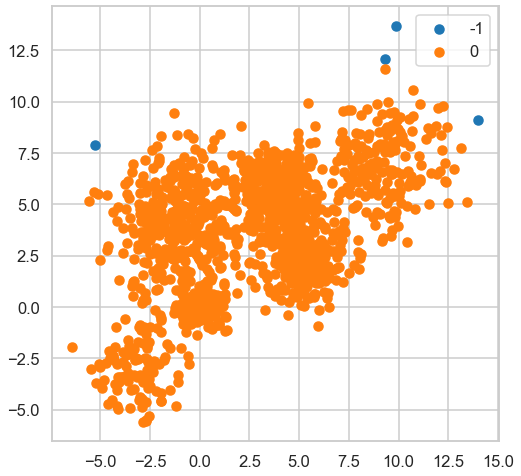

In [25]:
u_labels = np.unique(db.labels_)
for i in u_labels:
    plt.scatter(Multi_blob_Data[db.labels_ == i , 0] , Multi_blob_Data[db.labels_ == i , 1] , label = i)
plt.legend()
plt.show()


In [26]:
db = DBSCAN(eps=2, min_samples=20)
dbscan=db.fit_predict(Multi_blob_Data)
np.unique(dbscan)
silhouette_score(Multi_blob_Data,dbscan,metric='euclidean')

0.44948549198650606

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

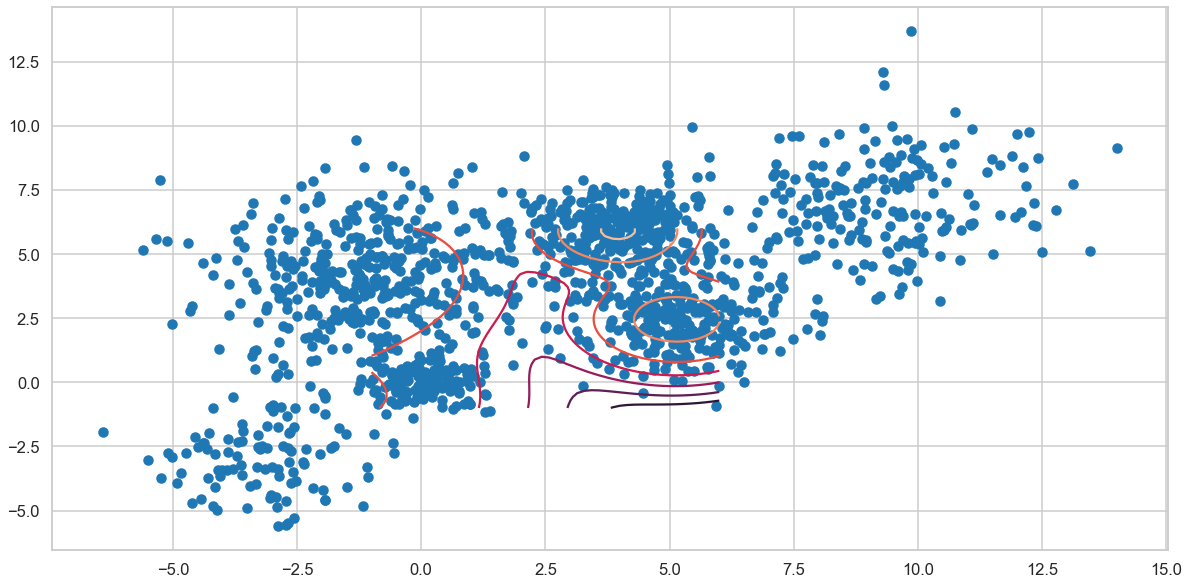

In [25]:
import pandas as pd


from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=6, covariance_type='spherical') #try different types in covariance like full, tied and diag.
gmm.fit(Multi_blob_Data)


labels = gmm.predict(Multi_blob_Data)
frame = pd.DataFrame(Multi_blob_Data)
frame['cluster'] = labels
frame.columns = ['Weight', 'Height', 'cluster']

  
X, Y = np.meshgrid(np.linspace(-1, 6), np.linspace(-1,6))
XX = np.array([X.ravel(), Y.ravel()]).T
Z = gmm.score_samples(XX)
Z = Z.reshape((50,50))
plt.contour(X, Y, Z)
plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1])
plt.show()


# iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [86]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

In [87]:
iris_data = pd.DataFrame(
    data= np.c_[iris_data['data'], iris_data['target']],
    columns= iris_data['feature_names'] + ['target']
    )

In [ ]:
#KMEANS CLUSTERING

inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(iris_data)
    inertias.append(kmeans.inertia_)
    cluster_labels = kmeans.labels_

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

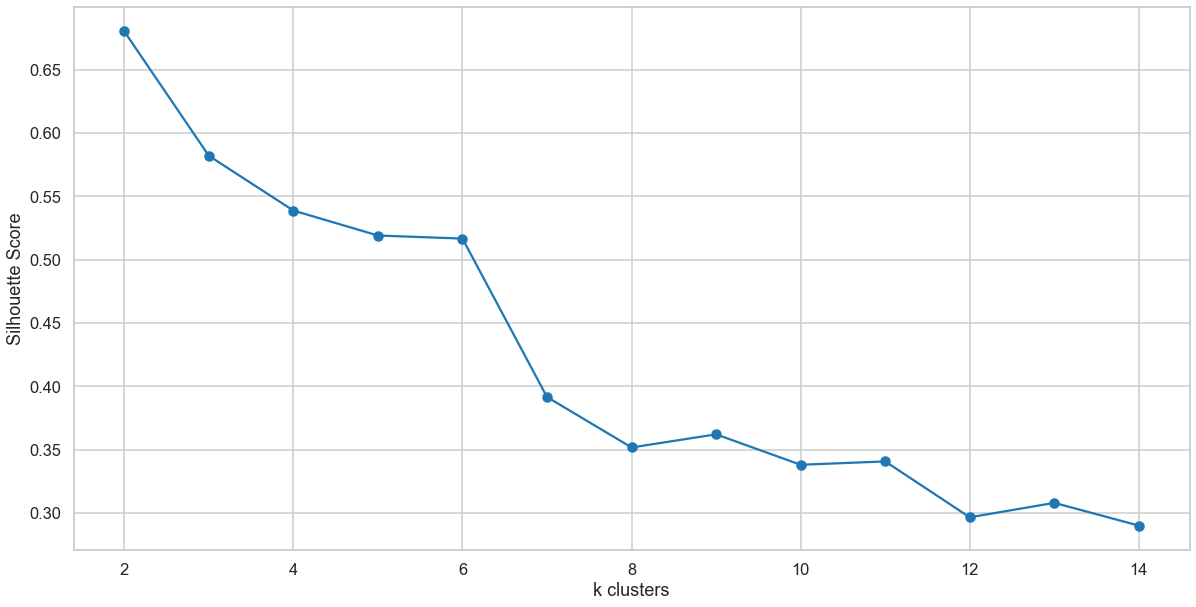

In [32]:
silhouette(iris_data)

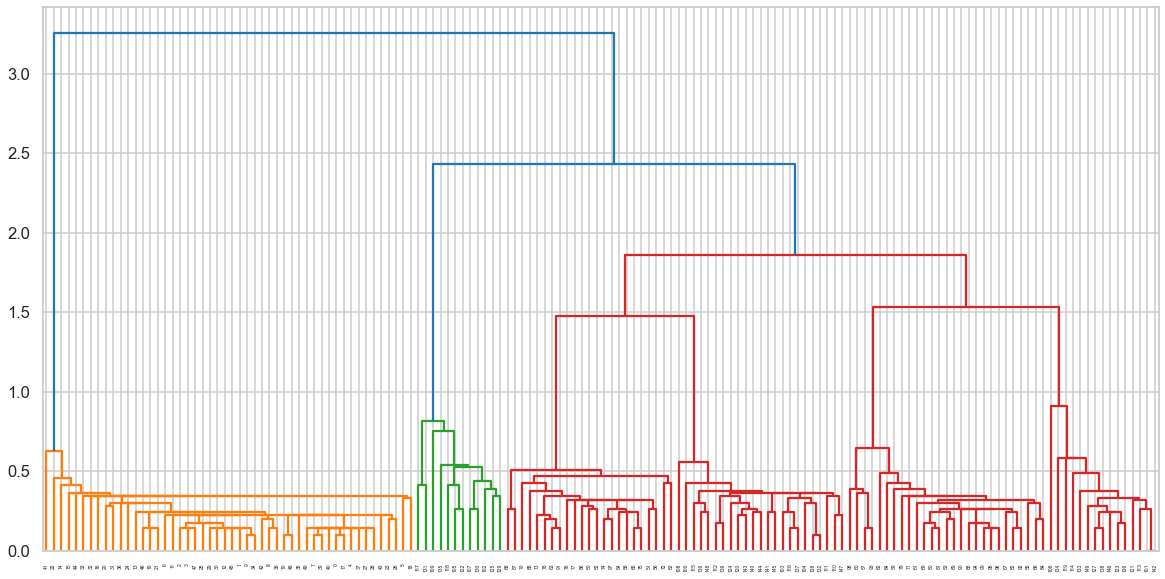

silhouette_score_euclidean=0.7177823076069726


In [39]:
#HIERARCHAL CLUSTERING 
#Euclidean, Single

model = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='single')
model.fit(iris_data)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(iris_data, method='single'))
plt.show()
score = silhouette_score(iris_data,model.labels_,metric='euclidean')
print(f'silhouette_score_euclidean={score}')



In [ ]:
#Euclidean, Average

model = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='average')
model.fit(iris_data)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(iris_data, method='average'))
plt.show()
score = silhouette_score(iris_data,model.labels_,metric='euclidean')
print(f'silhouette_score_euclidean={score}')


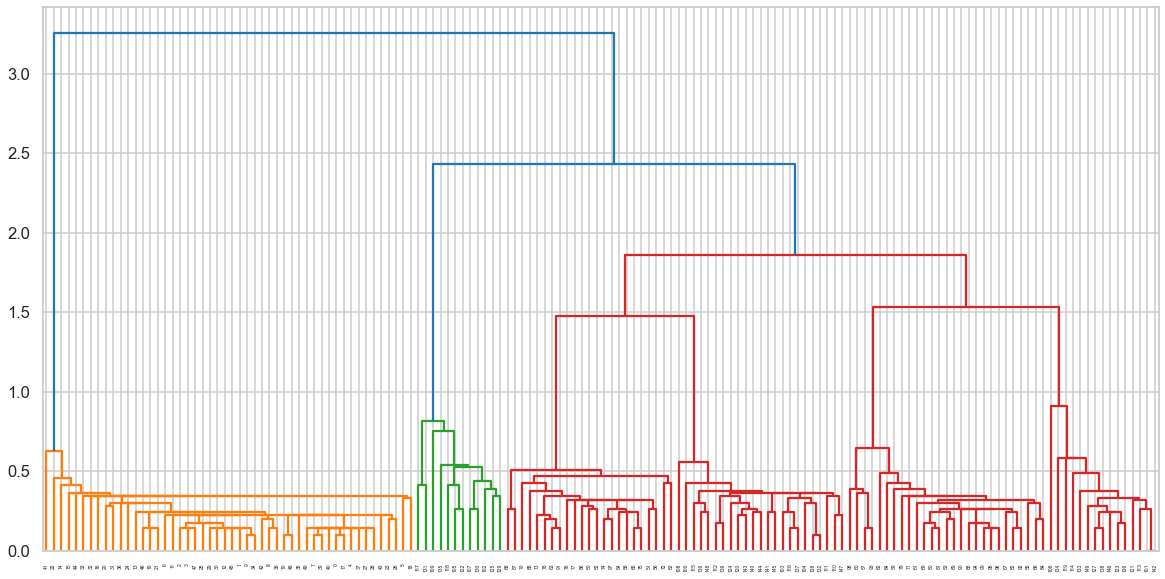

silhouette_score_cosine=0.870617157999181


In [40]:
#Cosine, Single

model = AgglomerativeClustering(n_clusters=6, affinity='cosine', linkage='single')
model.fit(iris_data)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(iris_data, method='single'))
plt.show()
score = silhouette_score(iris_data,model.labels_,metric='cosine')
print(f'silhouette_score_cosine={score}')



In [ ]:
#Cosine, Average

model = AgglomerativeClustering(n_clusters=6, affinity='cosine', linkage='average')
model.fit(iris_data)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(iris_data, method='average'))
plt.show()
score = silhouette_score(iris_data,model.labels_,metric='cosine')
print(f'silhouette_score_cosine={score}')


In [ ]:
#Manhattan, Single

model = AgglomerativeClustering(n_clusters=6, affinity='manhattan', linkage='single')
model.fit(iris_data)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(iris_data, method='single'))
plt.show()
score = silhouette_score(iris_data,model.labels_,metric='manhattan')
print(f'silhouette_score_cosine={score}')



In [ ]:
#Manhattan, Average

model = AgglomerativeClustering(n_clusters=6, affinity='manhattan', linkage='average')
model.fit(iris_data)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(iris_data, method='average'))
plt.show()
score = silhouette_score(iris_data,model.labels_,metric='manhattan')
print(f'silhouette_score_cosine={score}')



In [44]:
#DBSCAN

from sklearn.cluster import DBSCAN
import numpy as np

db = DBSCAN(eps=0.7, min_samples=15)
dbscan=db.fit_predict(iris_data)
np.unique(dbscan)

array([-1,  0,  1,  2])

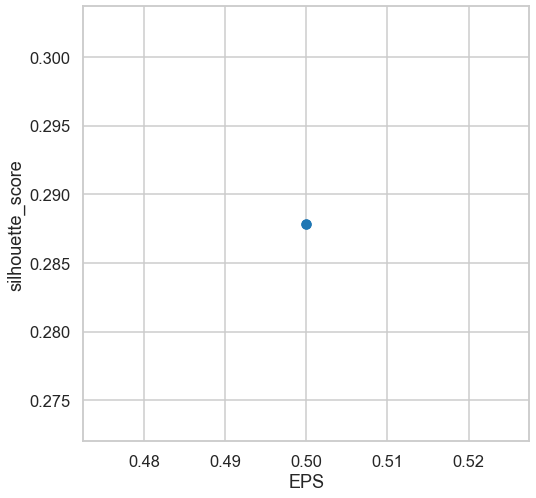

In [88]:
score=[] 
score1=[]
epsfinal=[]
samplesfinal=[]
eps = [0.1, 0.5, 2, 2.7, 3]
min_samples=[5, 10, 15, 20, 25]
for i in eps:
    db = DBSCAN(eps=i, min_samples=15)
    dbscan=db.fit_predict(iris_data)
    if(len(np.unique(db.labels_))>1):
        score.append(silhouette_score(iris_data,dbscan,metric='euclidean'))
        epsfinal.append(i)
       
    
plt.plot(epsfinal,score, marker='o')
plt.scatter(epsfinal,score)
plt.xlabel('EPS')
plt.ylabel('silhouette_score')
plt.show()

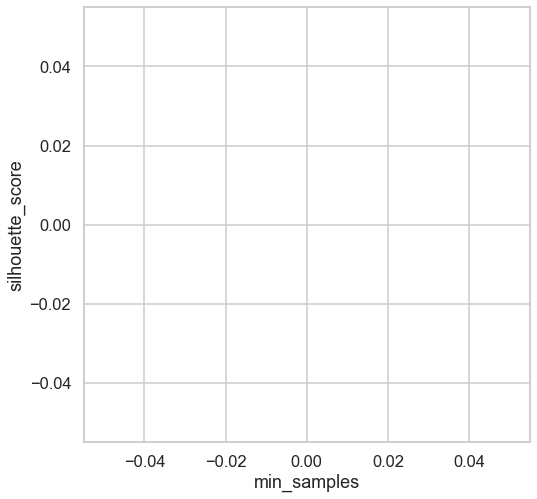

In [89]:
for j in min_samples:
    db = DBSCAN(eps=2, min_samples=j)
    dbscan=db.fit_predict(iris_data)
    if(len(np.unique(db.labels_))>1):
        score1.append(silhouette_score(iris_data,dbscan,metric='euclidean'))
        samplesfinal.append(j)
        
       
    
plt.plot(samplesfinal,score1, marker='o')
plt.scatter(samplesfinal,score1)
plt.xlabel('min_samples')
plt.ylabel('silhouette_score')
plt.show()

In [106]:
#db = DBSCAN(eps=2, min_samples=20)
#dbscan=db.fit_predict(iris_data)
#np.unique(dbscan)
#silhouette_score(iris_data,dbscan,metric='euclidean')

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

In [33]:
#GMM

import pandas as pd
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=6, covariance_type='spherical') #try different types in covariance like full, tied and diag.
fit=gmm.fit_predict(iris_data)


labels = gmm.predict(iris_data)
frame = pd.DataFrame(iris_data)
frame['cluster'] = labels
score = silhouette_score(iris_data,fit,metric='euclidean')
print(score)
X, Y = np.meshgrid(np.linspace(-1, 6), np.linspace(-1,6))
XX = np.array([X.ravel(), Y.ravel()]).T


0.7167283535330733


In [51]:
#Normalizing Data 

from sklearn import preprocessing
normalized_data = preprocessing.normalize(iris_data)
display(normalized_data)

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 , 0.        ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134, 0.        ],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949, 0.        ],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392, 0.        ],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 , 0.        ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704, 0.        ],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 , 0.        ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 , 0.        ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562, 0.        ],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451, 0.        ],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797, 0.        ],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129, 0.        ],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734, 0.        ],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308, 0.        ],
       [0.81120865, 0.55945424, 0.

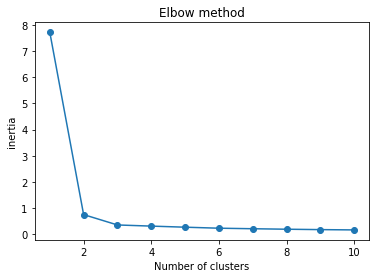

In [8]:
#KMEANS CLUSTERING(after normalization)

inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(normalized_data)
    inertias.append(kmeans.inertia_)
    cluster_labels = kmeans.labels_

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

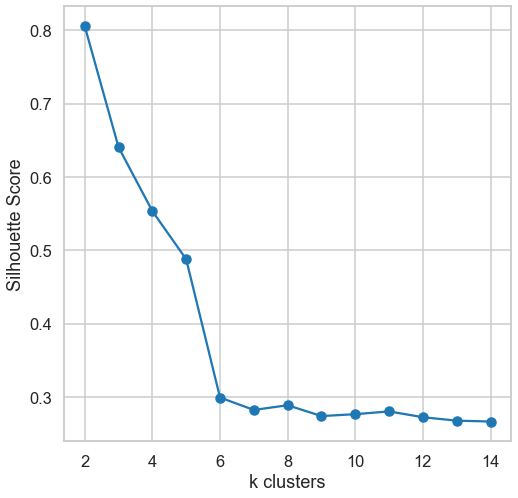

In [13]:
silhouette(normalized_data)

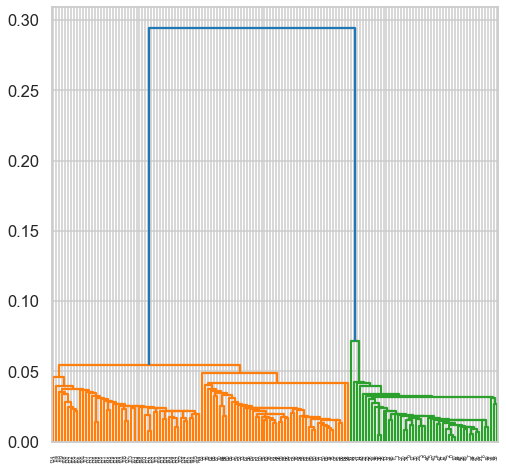

silhouette_score_euclidean=0.350897518754578


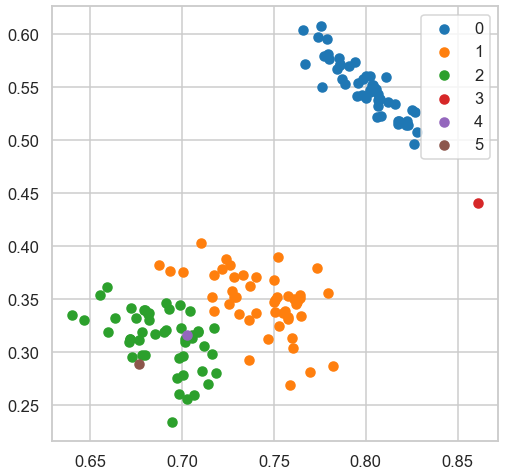

In [14]:
#Euclidean, Single(After Normalization)

model = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='single')
model.fit(normalized_data)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(normalized_data, method='single'))
plt.show()
score = silhouette_score(normalized_data,model.labels_,metric='euclidean')
print(f'silhouette_score_euclidean={score}')


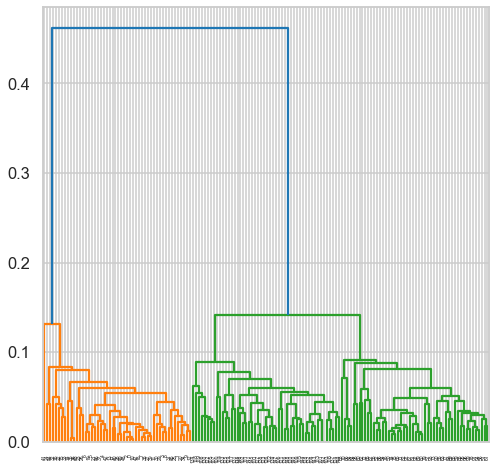

silhouette_score_euclidean=0.39973111405621753


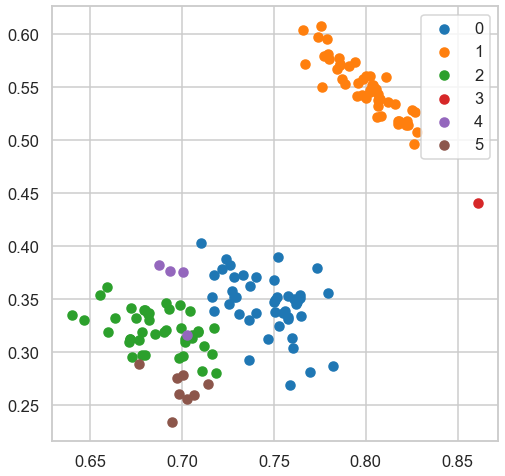

In [15]:
#Euclidean, Average(After Normalization)

model = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='average')
model.fit(normalized_data)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(normalized_data, method='average'))
plt.show()
score = silhouette_score(normalized_data,model.labels_,metric='euclidean')
print(f'silhouette_score_euclidean={score}')

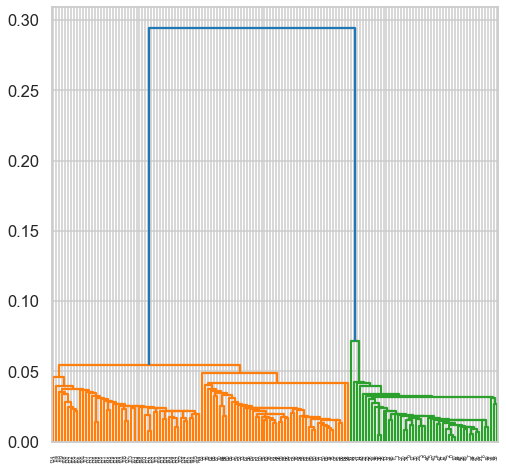

silhouette_score_cosine=0.4704311395312983


In [19]:
#Cosine, Single(After Normalization)

model = AgglomerativeClustering(n_clusters=6, affinity='cosine', linkage='single')
model.fit(normalized_data)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(normalized_data, method='single'))
plt.show()
score = silhouette_score(normalized_data,model.labels_,metric='cosine')
print(f'silhouette_score_cosine={score}')


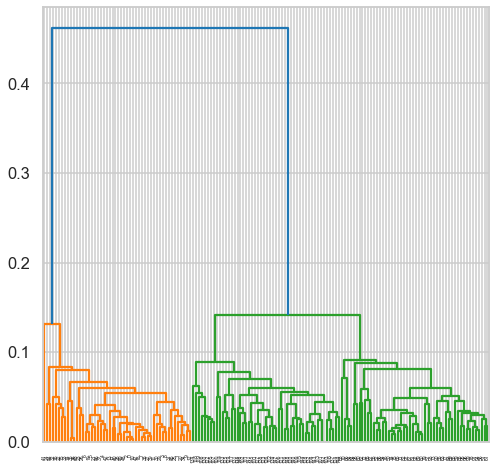

silhouette_score_cosine=0.5578511451627907


In [18]:
#Cosine, Average(After Normalization)

model = AgglomerativeClustering(n_clusters=6, affinity='cosine', linkage='average')
model.fit(normalized_data)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(normalized_data, method='average'))
plt.show()
score = silhouette_score(normalized_data,model.labels_,metric='cosine')
print(f'silhouette_score_cosine={score}')


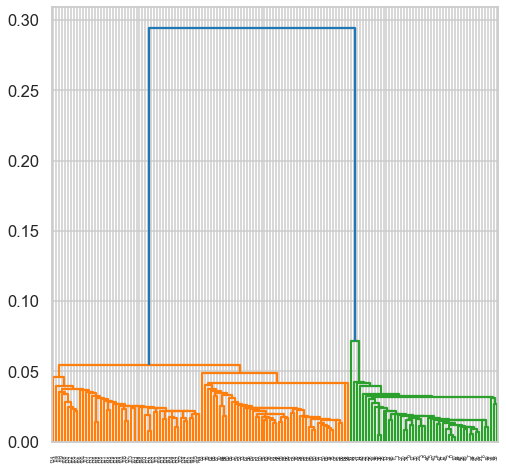

silhouette_score_cosine=0.02321288449061953


In [20]:
#Manhattan, Single(After Normazlization)

model = AgglomerativeClustering(n_clusters=6, affinity='manhattan', linkage='single')
model.fit(normalized_data)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(normalized_data, method='single'))
plt.show()
score = silhouette_score(normalized_data,model.labels_,metric='manhattan')
print(f'silhouette_score_cosine={score}')

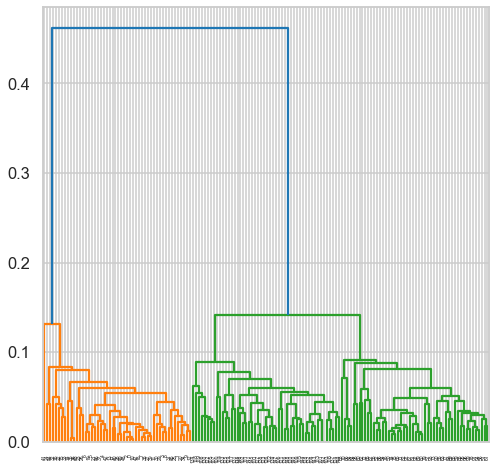

silhouette_score_cosine=0.394767482907579


In [21]:
#Manhattan, Average(After Normalization)

model = AgglomerativeClustering(n_clusters=6, affinity='manhattan', linkage='average')
model.fit(normalized_data)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(normalized_data, method='average'))
plt.show()
score = silhouette_score(normalized_data,model.labels_,metric='manhattan')
print(f'silhouette_score_cosine={score}')

In [ ]:
#DBSCAN(After Normalization)

from sklearn.cluster import DBSCAN
import numpy as np

db = DBSCAN(eps=0.7, min_samples=15)
dbscan=db.fit_predict(normalized_data)
np.unique(dbscan)

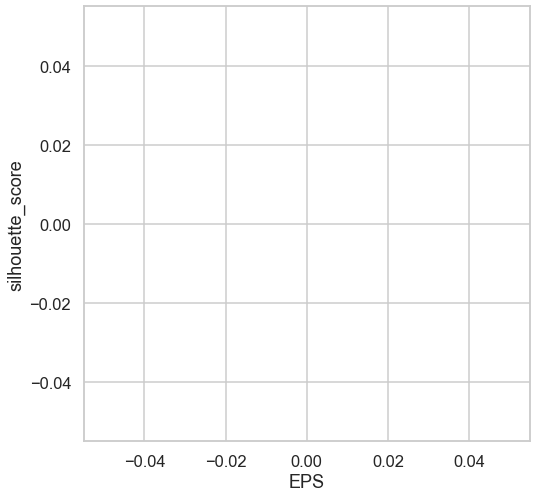

In [77]:
score=[] 
score1=[]
epsfinal=[]
samplesfinal=[]
eps = [0.1, 0.5, 2, 2.7, 3]
min_samples=[5, 10, 15, 20, 25]
for i in eps:
    db = DBSCAN(eps=i, min_samples=15)
    dbscan=db.fit_predict(normalized_data)
    if(len(np.unique(db.labels_))>1):
        score.append(silhouette_score(normalized_data,dbscan,metric='euclidean'))
        epsfinal.append(i)
       
    
plt.plot(epsfinal,score, marker='o')
plt.scatter(epsfinal,score)
plt.xlabel('EPS')
plt.ylabel('silhouette_score')
plt.show()

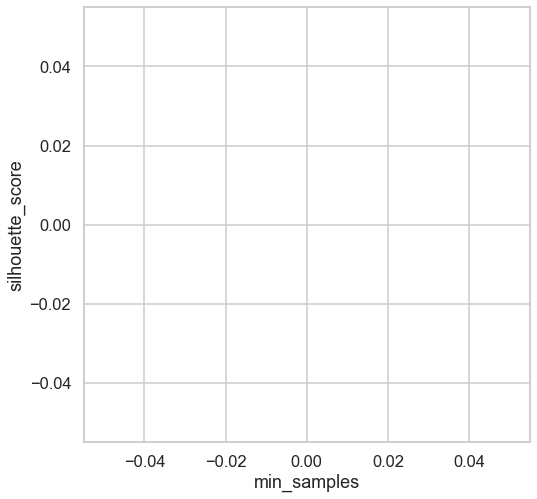

In [53]:
for j in min_samples:
    db = DBSCAN(eps=2, min_samples=j)
    dbscan=db.fit_predict(normalized_data)
    if(len(np.unique(db.labels_))>1):
        score1.append(silhouette_score(normalized_data,dbscan,metric='euclidean'))
        samplesfinal.append(j)
        
       
    
plt.plot(samplesfinal,score1, marker='o')
plt.scatter(samplesfinal,score1)
plt.xlabel('min_samples')
plt.ylabel('silhouette_score')
plt.show()


In [107]:
#db = DBSCAN(eps=2, min_samples=20)
#dbscan=db.fit_predict(normalized_data)
#np.unique(dbscan)
#silhouette_score(normalized_data,dbscan,metric='euclidean')

In [55]:
#GMM(After Normalization)

import pandas as pd
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=6, covariance_type='spherical') #try different types in covariance like full, tied and diag.
fit=gmm.fit_predict(normalized_data)

labels = gmm.predict(normalized_data)
frame = pd.DataFrame(normalized_data)
frame['cluster'] = labels
score = silhouette_score(normalized_data,fit,metric='euclidean')
print(score)
X, Y = np.meshgrid(np.linspace(-1, 6), np.linspace(-1,6))
XX = np.array([X.ravel(), Y.ravel()]).T


0.31367561752812606


In [30]:
#KNN

from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

x= iris_data.iloc[:, :-1]
y= iris_data.iloc[:, -1]
# split the data into train and test sets
x_train, x_test, y_train, y_test= train_test_split(x, y,
                                                   test_size= 0.2,
                                                   shuffle= True, 
                                                   random_state= 0)
x_train= np.asarray(x_train)
y_train= np.asarray(y_train)

x_test= np.asarray(x_test)
y_test= np.asarray(y_test)
print(f'training set size: {x_train.shape[0]} samples \ntest set size: {x_test.shape[0]} samples')

training set size: 120 samples 
test set size: 30 samples


In [31]:
scaler= Normalizer().fit(x_train) 
normalized_x_train= scaler.transform(x_train) 
normalized_x_test= scaler.transform(x_test) 

In [32]:
K=6
knn=KNeighborsClassifier(K)
knn.fit(normalized_x_train, y_train)
y_pred_sklearn= knn.predict(normalized_x_test)
print(y_pred_sklearn)

[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 1. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 1. 1. 0.]


In [ ]:
iris_data.shape

In [ ]:
iris_data.head()

In [41]:
#PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
features = iris_data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
scaled_features = StandardScaler().fit_transform(features)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_features)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

new_iris = pd.concat([principalDf, iris_data[['target']]], axis = 1)
new_iris

,principal component 1,principal component 2,target
0,-2.264703,0.480027,0.0
1,-2.080961,-0.674134,0.0
2,-2.364229,-0.341908,0.0
3,-2.299384,-0.597395,0.0
4,-2.389842,0.646835,0.0
...,...,...,...
145,1.870503,0.386966,2.0
146,1.564580,-0.896687,2.0
147,1.521170,0.269069,2.0
148,1.372788,1.011254,2.0


In [39]:
iris_data.shape

(150, 5)

In [95]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


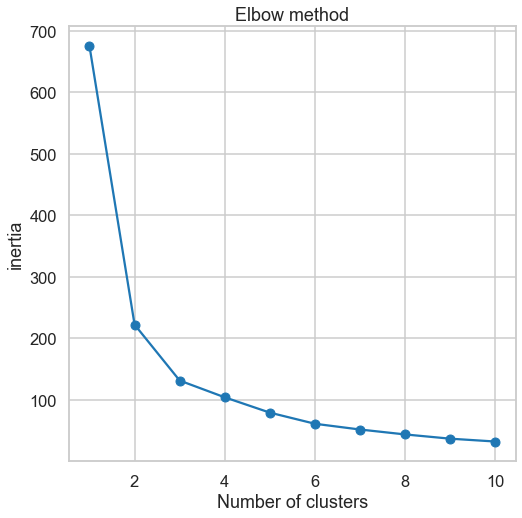

In [81]:
#KMEANS CLUSTERING(After PCA)

inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(new_iris)
    inertias.append(kmeans.inertia_)
    cluster_labels = kmeans.labels_

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

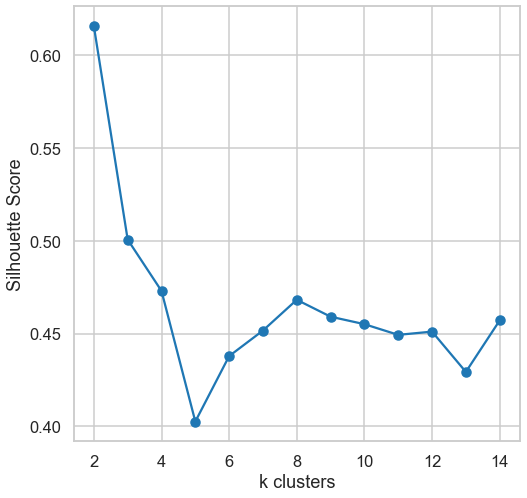

In [82]:
silhouette(new_iris)

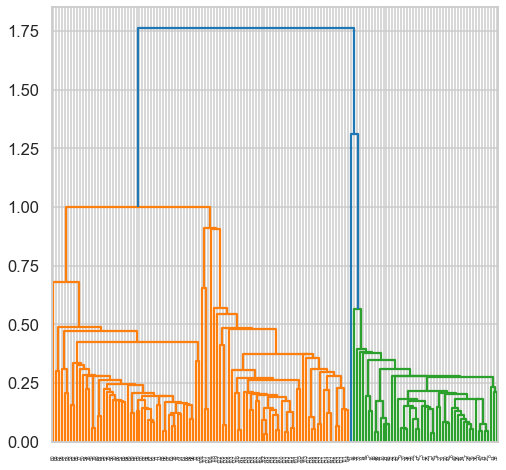

silhouette_score_euclidean=0.36064327869532675


In [83]:
#HIERARCHAL CLUSTERING(After PCA)
#Euclidean, Single(After PCA)

model = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='single')
model.fit(new_iris)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(new_iris, method='single'))
plt.show()
score = silhouette_score(new_iris,model.labels_,metric='euclidean')
print(f'silhouette_score_euclidean={score}')


In [ ]:
#Euclidean, Average(After PCA)

model = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='average')
model.fit(new_iris)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(new_iris, method='average'))
plt.show()
score = silhouette_score(new_iris,model.labels_,metric='euclidean')
print(f'silhouette_score_euclidean={score}')


In [ ]:
#Cosine, Single(After PCA)

model = AgglomerativeClustering(n_clusters=6, affinity='cosine', linkage='single')
model.fit(new_iris)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(new_iris, method='single'))
plt.show()
score = silhouette_score(new_iris,model.labels_,metric='cosine')
print(f'silhouette_score_cosine={score}')


In [ ]:
#Cosine, Average(After PCA)

model = AgglomerativeClustering(n_clusters=6, affinity='cosine', linkage='average')
model.fit(new_iris)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(new_iris, method='average'))
plt.show()
score = silhouette_score(new_iris,model.labels_,metric='cosine')
print(f'silhouette_score_cosine={score}')


In [ ]:
#Manhattan, Single(After PCA)

model = AgglomerativeClustering(n_clusters=6, affinity='manhattan', linkage='single')
model.fit(new_iris)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(new_iris, method='single'))
plt.show()
score = silhouette_score(new_iris,model.labels_,metric='manhattan')
print(f'silhouette_score_cosine={score}')

In [ ]:
#Manhattan, Average(After PCA)

model = AgglomerativeClustering(n_clusters=6, affinity='manhattan', linkage='average')
model.fit(new_iris)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(new_iris, method='average'))
plt.show()
score = silhouette_score(new_iris,model.labels_,metric='manhattan')
print(f'silhouette_score_cosine={score}')

In [84]:
#DBSCAN(After PCA)

from sklearn.cluster import DBSCAN
import numpy as np

db = DBSCAN(eps=0.7, min_samples=15)
dbscan=db.fit_predict(new_iris)
np.unique(dbscan)

array([-1,  0,  1,  2])

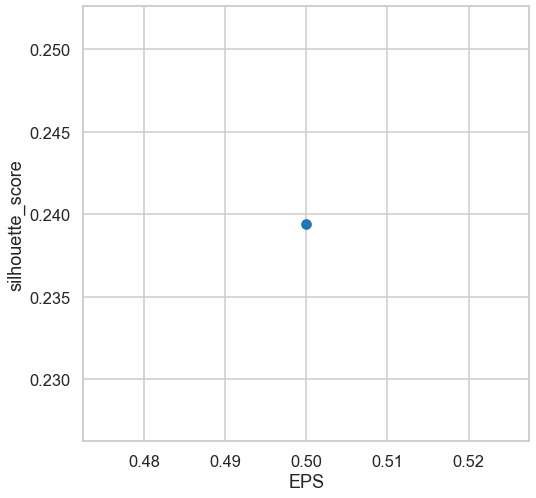

In [90]:
score=[] 
score1=[]
epsfinal=[]
samplesfinal=[]
eps = [0.1, 0.5, 2, 2.7, 3]
min_samples=[5, 10, 15, 20, 25]
for i in eps:
    db = DBSCAN(eps=i, min_samples=15)
    dbscan=db.fit_predict(new_iris)
    if(len(np.unique(db.labels_))>1):
        score.append(silhouette_score(new_iris,dbscan,metric='euclidean'))
        epsfinal.append(i)
       
    
plt.plot(epsfinal,score, marker='o')
plt.scatter(epsfinal,score)
plt.xlabel('EPS')
plt.ylabel('silhouette_score')
plt.show()

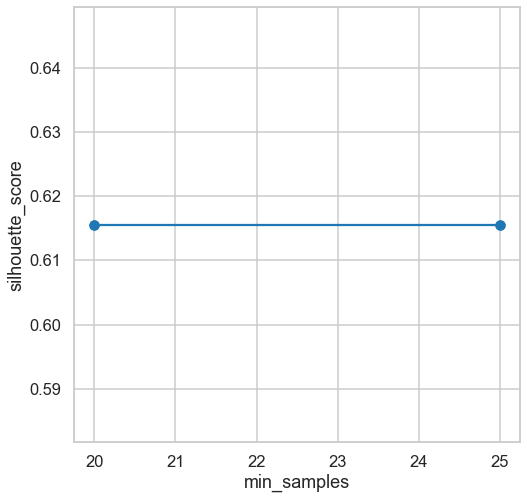

In [91]:
for j in min_samples:
    db = DBSCAN(eps=2, min_samples=j)
    dbscan=db.fit_predict(new_iris)
    if(len(np.unique(db.labels_))>1):
        score1.append(silhouette_score(new_iris,dbscan,metric='euclidean'))
        samplesfinal.append(j)
        
       
    
plt.plot(samplesfinal,score1, marker='o')
plt.scatter(samplesfinal,score1)
plt.xlabel('min_samples')
plt.ylabel('silhouette_score')
plt.show()

In [92]:
db = DBSCAN(eps=2, min_samples=20)
dbscan=db.fit_predict(new_iris)
np.unique(dbscan)
silhouette_score(new_iris,dbscan,metric='euclidean')

0.6155555302089208

In [113]:
#GMM(After PCA)
import pandas as pd
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=6, covariance_type='spherical') #try different types in covariance like full, tied and diag.
fit=gmm.fit_predict(new_iris)

labels = gmm.predict(new_iris)
frame = pd.DataFrame(new_iris)
frame['cluster'] = labels

score = silhouette_score(new_iris,fit,metric='euclidean')
print(score)


0.6536740063734918


## Customer dataset
Repeat all the above on the customer data set 

In [3]:
df = pd.read_csv('Customer data.csv')

In [12]:
display(df)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


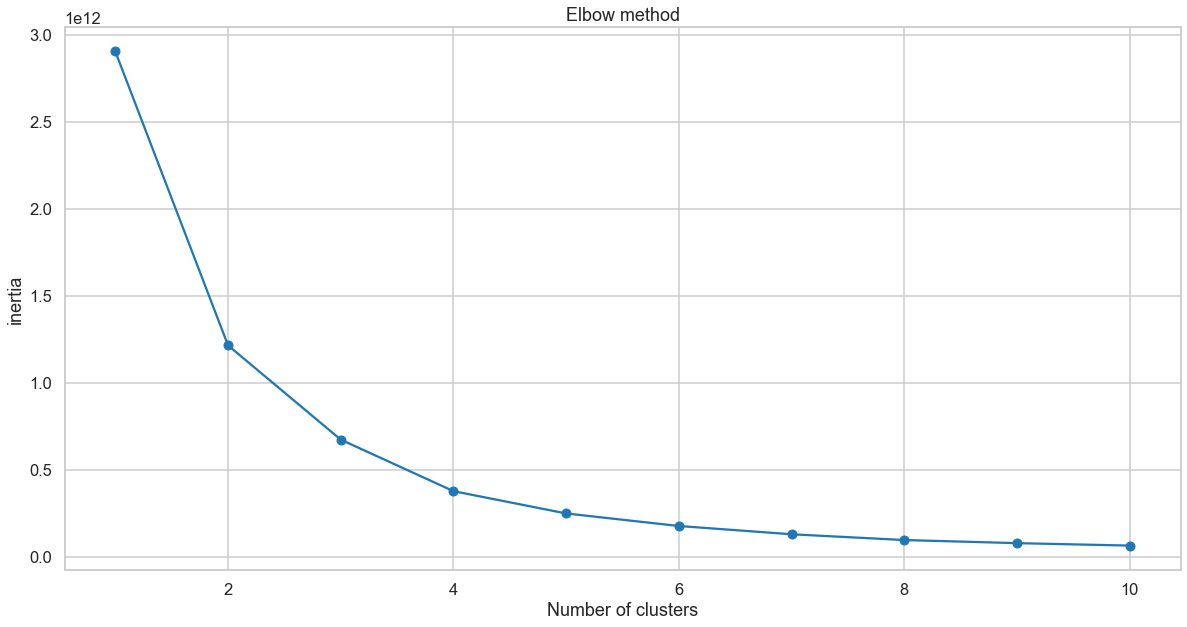

In [13]:
#KMEANS CLUSTERING

inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df.values)
    inertias.append(kmeans.inertia_)
    cluster_labels = kmeans.labels_

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

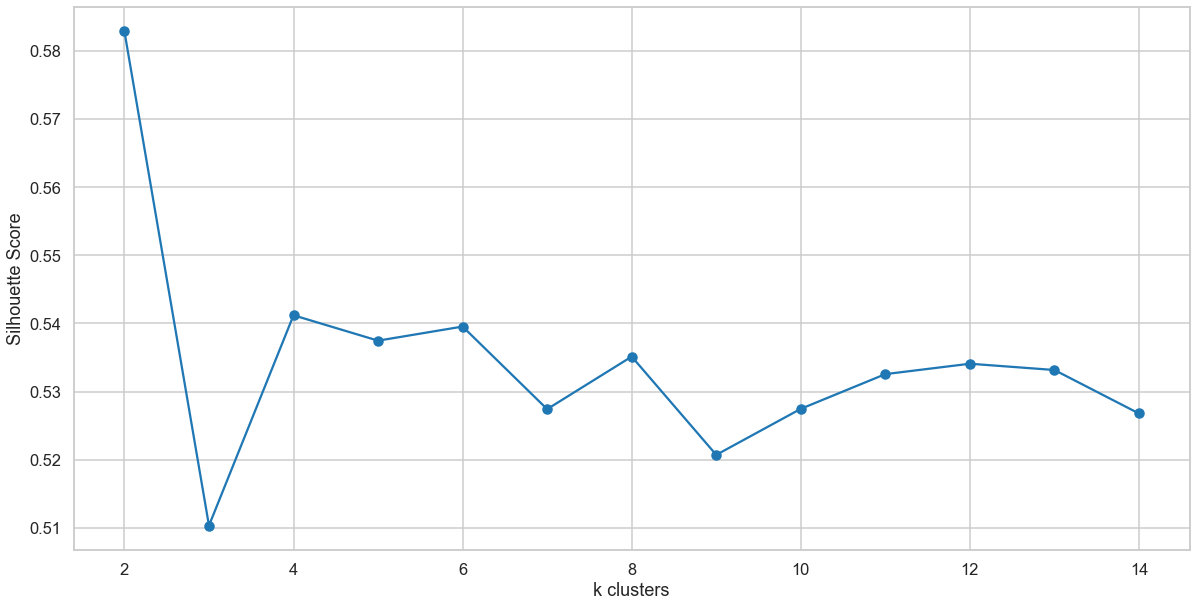

In [15]:
silhouette(df.values)

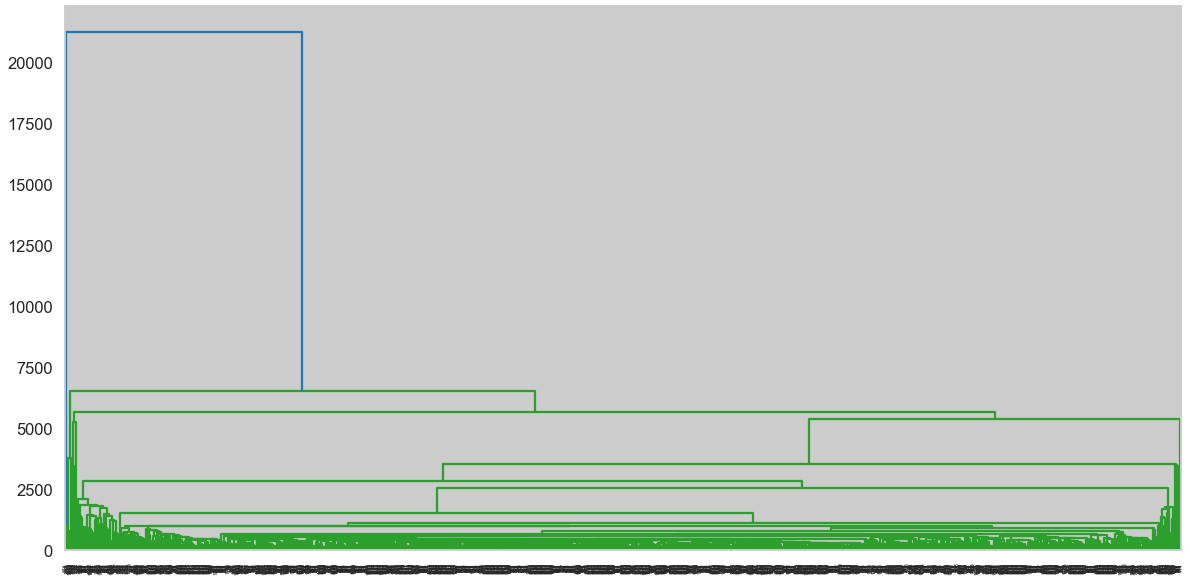

silhouette_score_euclidean=0.6753366082488176


In [46]:
#HIERARCHAL CLUSTERING
#Euclidean, Single

model = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='single')
model.fit(df.values)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(df.values, method='single'))
plt.show()
score = silhouette_score(df.values,model.labels_,metric='euclidean')
print(f'silhouette_score_euclidean={score}')



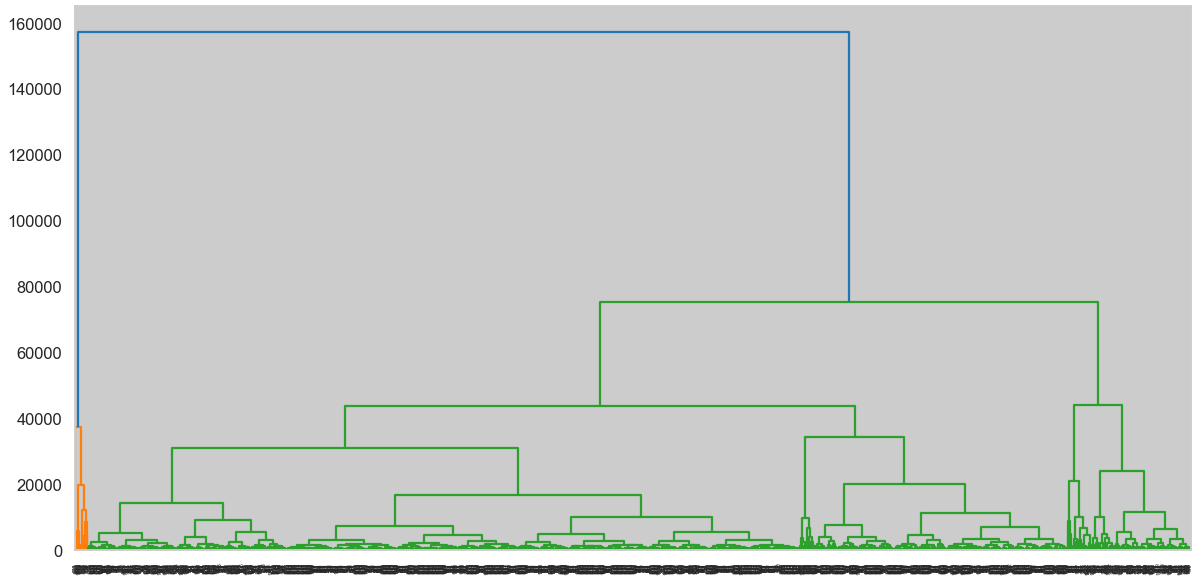

silhouette_score_euclidean=0.46935205847848754


In [47]:
#Euclidean, Average

model = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='average')
model.fit(df.values)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(df.values, method='average'))
plt.show()
score = silhouette_score(df.values,model.labels_,metric='euclidean')
print(f'silhouette_score_euclidean={score}')



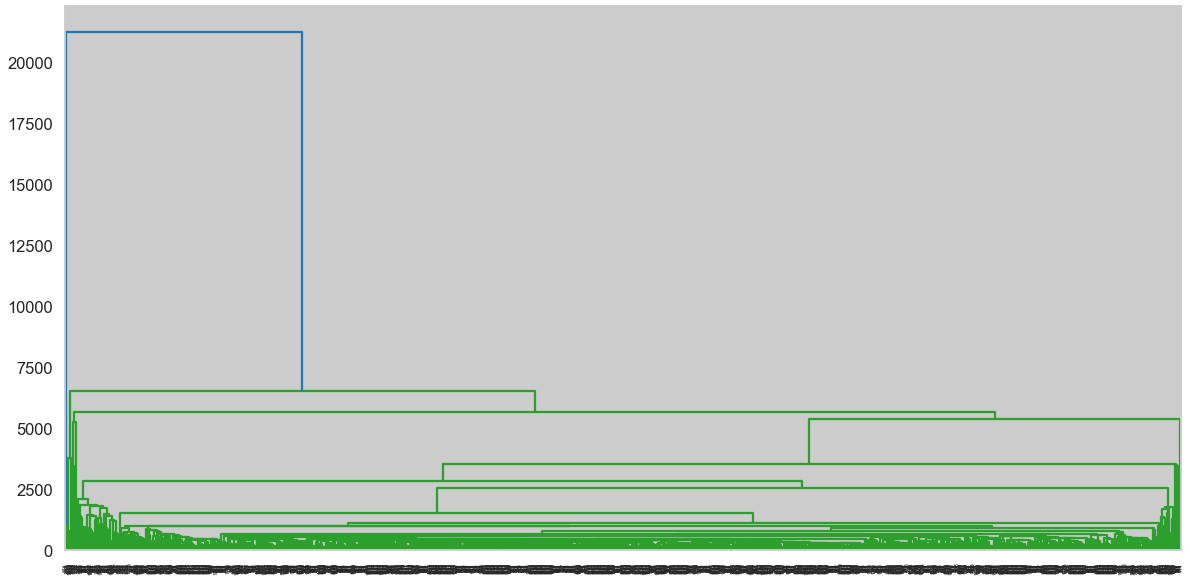

silhouette_score_cosine=0.8002485064961352


In [48]:
#Cosine, Single

model = AgglomerativeClustering(n_clusters=6, affinity='cosine', linkage='single')
model.fit(df.values)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(df.values, method='single'))
plt.show()
score = silhouette_score(df.values,model.labels_,metric='cosine')
print(f'silhouette_score_cosine={score}')


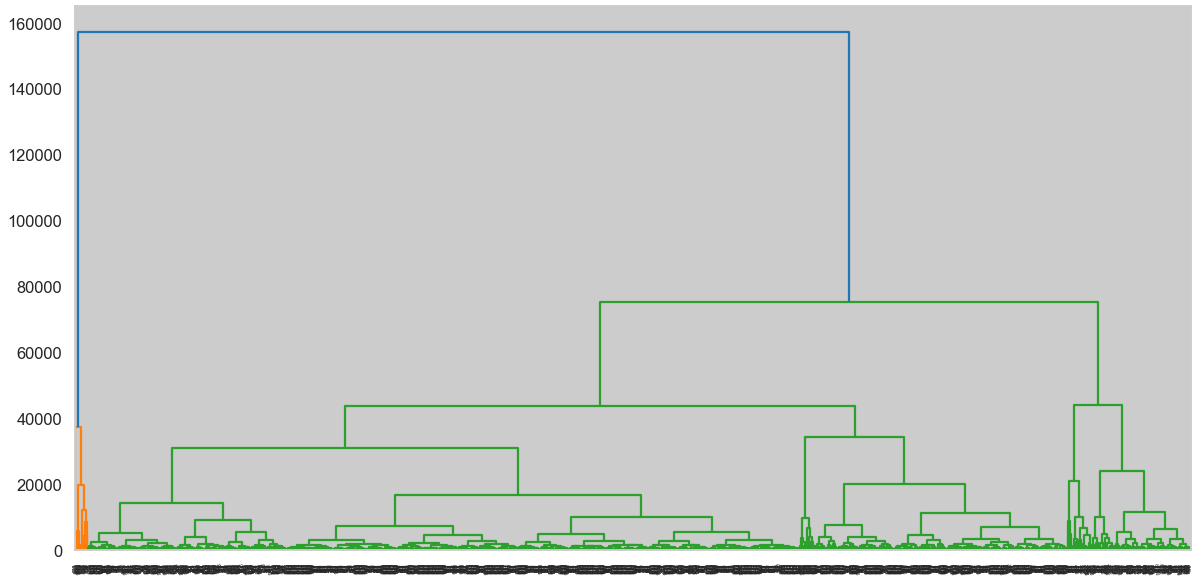

silhouette_score_cosine=0.6715255528871199


In [49]:
#Cosine, Average

model = AgglomerativeClustering(n_clusters=6, affinity='cosine', linkage='average')
model.fit(df.values)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(df.values, method='average'))
plt.show()
score = silhouette_score(df.values,model.labels_,metric='cosine')
print(f'silhouette_score_cosine={score}')


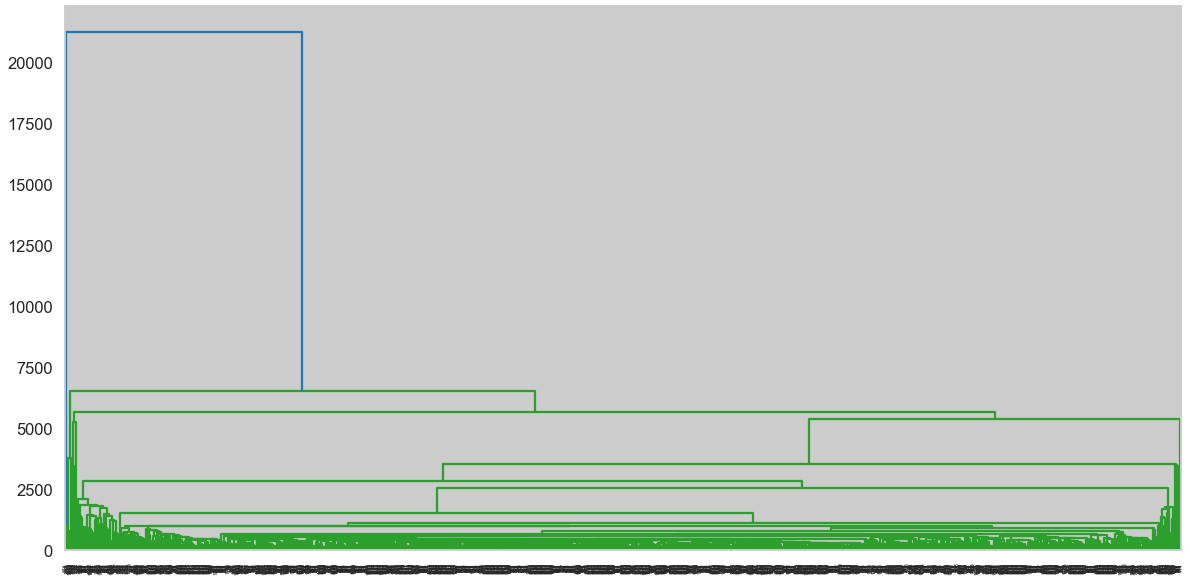

silhouette_score_manhattan=0.6715811498074055


In [50]:
#Manhattan, Single

model = AgglomerativeClustering(n_clusters=6, affinity='manhattan', linkage='single')
model.fit(df.values)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(df.values, method='single'))
plt.show()
score = silhouette_score(df.values,model.labels_,metric='manhattan')
print(f'silhouette_score_manhattan={score}')



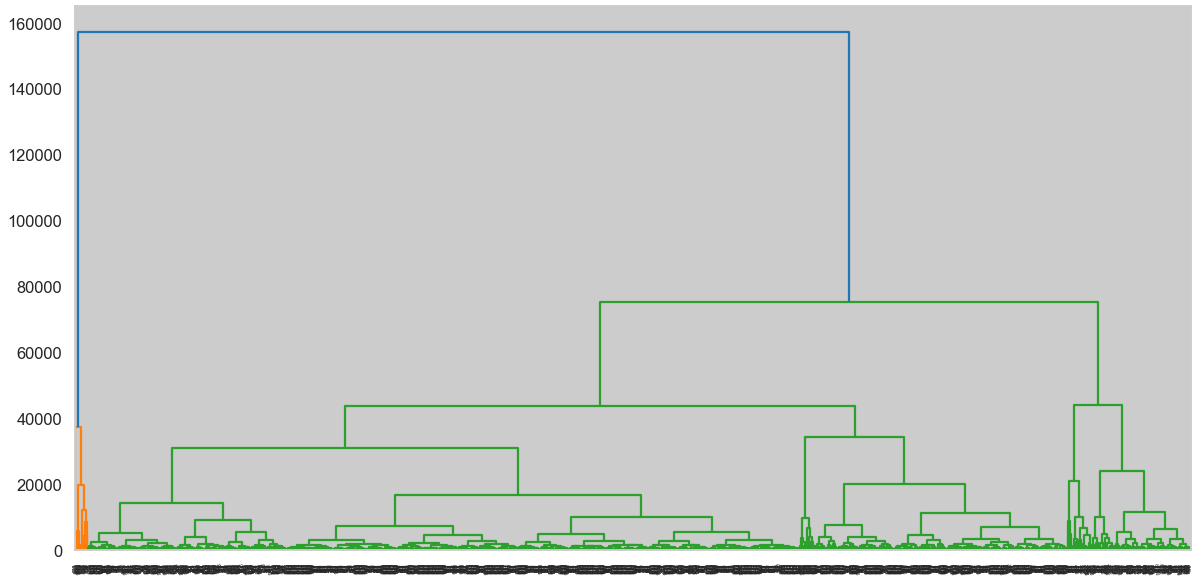

silhouette_score_manhattan=0.42346088775353313


In [45]:
#Manhattan, Average

model = AgglomerativeClustering(n_clusters=6, affinity='manhattan', linkage='average')
model.fit(df.values)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(df.values, method='average'))
plt.show()
score = silhouette_score(df.values,model.labels_,metric='manhattan')
print(f'silhouette_score_manhattan={score}')



In [60]:
#DBSCAN

from sklearn.cluster import DBSCAN
import numpy as np

db = DBSCAN(eps=0.7, min_samples=15)
dbscan=db.fit_predict(df.values)
np.unique(dbscan)


array([-1])

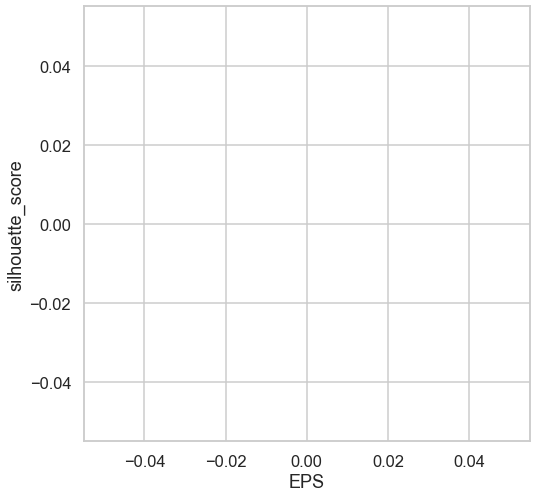

In [61]:
score=[] 
score1=[]
epsfinal=[]
samplesfinal=[]
eps = [0.1, 0.5, 2, 2.7, 3]
min_samples=[5, 10, 15, 20, 25]
for i in eps:
    db = DBSCAN(eps=i, min_samples=15)
    dbscan=db.fit_predict(df.values)
    if(len(np.unique(db.labels_))>1):
        score.append(silhouette_score(df.values,dbscan,metric='euclidean'))
        epsfinal.append(i)
       
    
plt.plot(epsfinal,score, marker='o')
plt.scatter(epsfinal,score)
plt.xlabel('EPS')
plt.ylabel('silhouette_score')
plt.show()

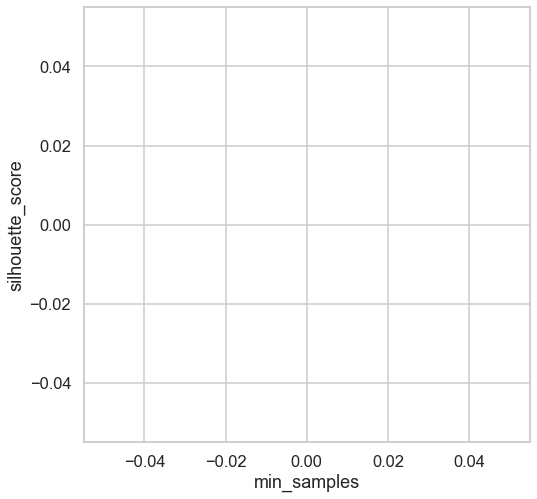

In [62]:
for j in min_samples:
    db = DBSCAN(eps=2, min_samples=j)
    dbscan=db.fit_predict(df.values)
    if(len(np.unique(db.labels_))>1):
        score1.append(silhouette_score(df.values,dbscan,metric='euclidean'))
        samplesfinal.append(j)
        
       
    
plt.plot(samplesfinal,score1, marker='o')
plt.scatter(samplesfinal,score1)
plt.xlabel('min_samples')
plt.ylabel('silhouette_score')
plt.show()


In [108]:
#db = DBSCAN(eps=2, min_samples=20)
#dbscan=db.fit_predict(df.values)
#np.unique(dbscan)
#silhouette_score(df.values,dbscan,metric='euclidean')

In [28]:
#GMM

import pandas as pd
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=6, covariance_type='spherical') #try different types in covariance like full, tied and diag.
fit=gmm.fit_predict(df.values)

labels = gmm.predict(df.values)
frame = pd.DataFrame(df.values)
frame['cluster'] = labels
score = silhouette_score(df.values,fit,metric='euclidean')
print(score)
X, Y = np.meshgrid(np.linspace(-1, 6), np.linspace(-1,6))
XX = np.array([X.ravel(), Y.ravel()]).T

0.48343595290283553


In [4]:
#NORMALIZING DATA

from sklearn import preprocessing
normalized_data_df = preprocessing.normalize(df.values)
display(normalized_data_df)

array([[9.99999223e-01, 0.00000000e+00, 0.00000000e+00, ...,
        1.24669902e-03, 9.99999213e-09, 1.99999843e-08],
       [9.99998863e-01, 9.99998843e-09, 9.99998843e-09, ...,
        1.50772826e-03, 9.99998843e-09, 1.99999769e-08],
       [9.99999602e-01, 0.00000000e+00, 0.00000000e+00, ...,
        8.92099618e-04, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.99999627e-01, 0.00000000e+00, 0.00000000e+00, ...,
        8.63982415e-04, 0.00000000e+00, 0.00000000e+00],
       [9.99999520e-01, 9.99979531e-09, 9.99979531e-09, ...,
        9.79659946e-04, 0.00000000e+00, 0.00000000e+00],
       [9.99999766e-01, 0.00000000e+00, 0.00000000e+00, ...,
        6.84146157e-04, 0.00000000e+00, 0.00000000e+00]])

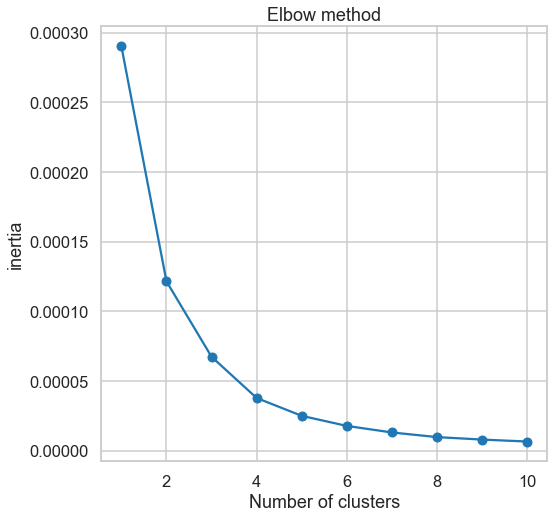

In [65]:
#KMEANS CLUSTERING(After Normalization)

inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(normalized_data_df)
    inertias.append(kmeans.inertia_)
    cluster_labels = kmeans.labels_

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

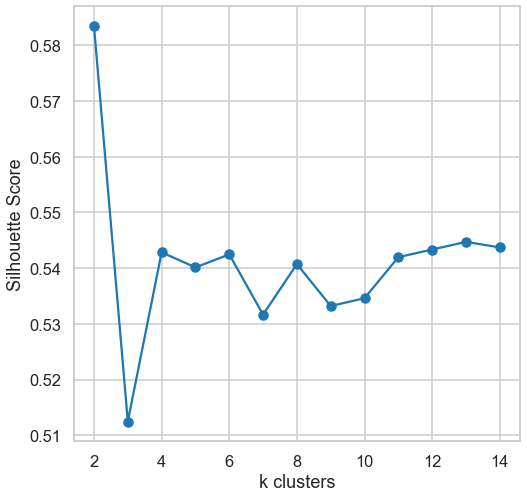

In [68]:
silhouette(normalized_data_df)

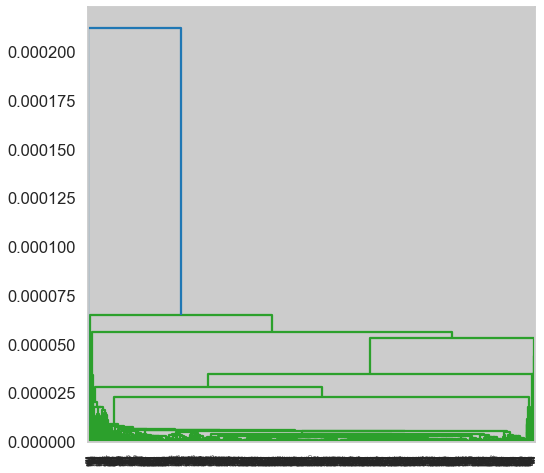

silhouette_score_euclidean=0.6756825479805599


In [69]:
#HIERARCHAL CLUSTERING(After Normalization)
#Euclidean, Single(After Normalization)

model = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='single')
model.fit(normalized_data_df)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(normalized_data_df, method='single'))
plt.show()
score = silhouette_score(normalized_data_df,model.labels_,metric='euclidean')
print(f'silhouette_score_euclidean={score}')


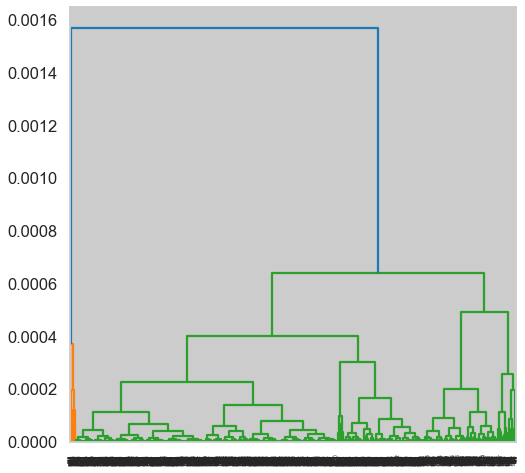

silhouette_score_euclidean=0.520024674804673


In [70]:
#Euclidean, Average(After Normalization)

model = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='average')
model.fit(normalized_data_df)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(normalized_data_df, method='average'))
plt.show()
score = silhouette_score(normalized_data_df,model.labels_,metric='euclidean')
print(f'silhouette_score_euclidean={score}')


In [ ]:
#Cosine, Single(After Normalization)

model = AgglomerativeClustering(n_clusters=6, affinity='cosine', linkage='single')
model.fit(normalized_data_df)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(normalized_data_df, method='single'))
plt.show()
score = silhouette_score(normalized_data_df,model.labels_,metric='cosine')
print(f'silhouette_score_cosine={score}')


In [ ]:
#Cosine, Average(After Normalization)

model = AgglomerativeClustering(n_clusters=6, affinity='cosine', linkage='average')
model.fit(normalized_data_df)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(normalized_data_df, method='average'))
plt.show()
score = silhouette_score(normalized_data_df,model.labels_,metric='cosine')
print(f'silhouette_score_cosine={score}')


In [ ]:
#Manhattan, Single(After Normalization)

model = AgglomerativeClustering(n_clusters=6, affinity='manhattan', linkage='single')
model.fit(normalized_data_df)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(normalized_data_df, method='single'))
plt.show()
score = silhouette_score(normalized_data_df,model.labels_,metric='manhattan')
print(f'silhouette_score_manhattan={score}')


In [ ]:
#Manhattan, Average(After Normalization)

model = AgglomerativeClustering(n_clusters=6, affinity='manhattan', linkage='average')
model.fit(normalized_data_df)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(normalized_data_df, method='average'))
plt.show()
score = silhouette_score(normalized_data_df,model.labels_,metric='manhattan')
print(f'silhouette_score_manhattan={score}')


In [71]:
#DBSCAN(After Normalization)

from sklearn.cluster import DBSCAN
import numpy as np

db = DBSCAN(eps=0.7, min_samples=15)
dbscan=db.fit_predict(normalized_data_df)
np.unique(dbscan)


array([0])

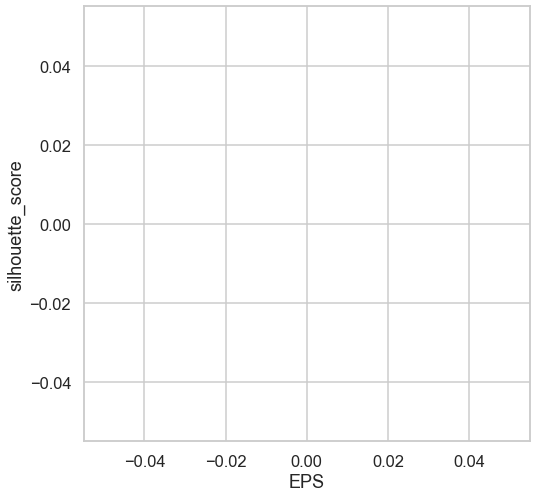

In [72]:
score=[] 
score1=[]
epsfinal=[]
samplesfinal=[]
eps = [0.1, 0.5, 2, 2.7, 3]
min_samples=[5, 10, 15, 20, 25]
for i in eps:
    db = DBSCAN(eps=i, min_samples=15)
    dbscan=db.fit_predict(normalized_data_df)
    if(len(np.unique(db.labels_))>1):
        score.append(silhouette_score(normalized_data_df,dbscan,metric='euclidean'))
        epsfinal.append(i)
       
    
plt.plot(epsfinal,score, marker='o')
plt.scatter(epsfinal,score)
plt.xlabel('EPS')
plt.ylabel('silhouette_score')
plt.show()

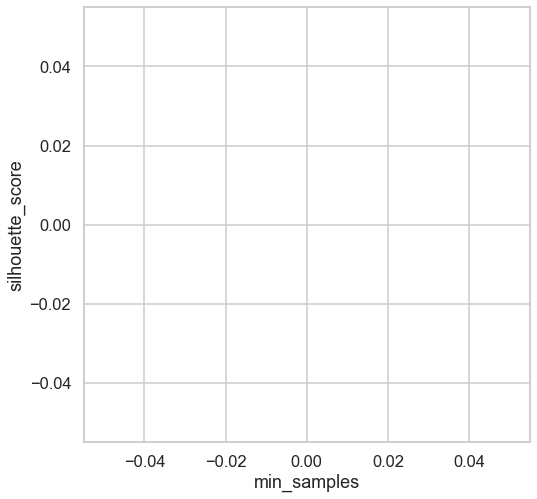

In [73]:
for j in min_samples:
    db = DBSCAN(eps=2, min_samples=j)
    dbscan=db.fit_predict(normalized_data_df)
    if(len(np.unique(db.labels_))>1):
        score1.append(silhouette_score(normalized_data_df,dbscan,metric='euclidean'))
        samplesfinal.append(j)
        
       
    
plt.plot(samplesfinal,score1, marker='o')
plt.scatter(samplesfinal,score1)
plt.xlabel('min_samples')
plt.ylabel('silhouette_score')
plt.show()

In [109]:
#db = DBSCAN(eps=2, min_samples=20)
#dbscan=db.fit_predict(normalized_data_df)
#np.unique(dbscan)
#silhouette_score(normalized_data_df,dbscan,metric='euclidean')

In [5]:
#GMM(After Normalization)

import pandas as pd
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=6, covariance_type='tied') #try different types in covariance like full, tied and diag.
fit=gmm.fit_predict(normalized_data_df)


score = silhouette_score(normalized_data_df , fit , metric='euclidean')
print(score)

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [94]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [96]:
#PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
features = df[['ID', 'Sex', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size' ]]
scaled_features = StandardScaler().fit_transform(features)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_features)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

new_df = pd.concat([principalDf], axis = 1)
new_df

,principal component 1,principal component 2
0,2.764854,1.603750
1,1.214953,-1.020748
2,-0.301240,0.163234
3,2.017071,-0.282091
4,1.908107,0.057009
...,...,...
1995,-1.639754,1.548789
1996,-1.439647,0.389443
1997,-2.237770,-1.080075
1998,-2.527288,0.396404


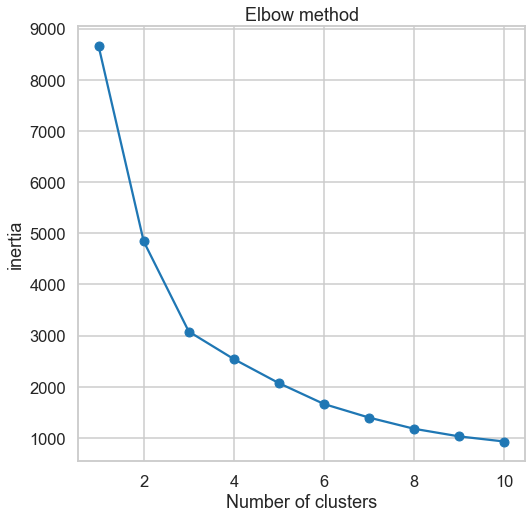

In [97]:
#KMEANS CLUSTERING(After PCA)

inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(new_df)
    inertias.append(kmeans.inertia_)
    cluster_labels = kmeans.labels_

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

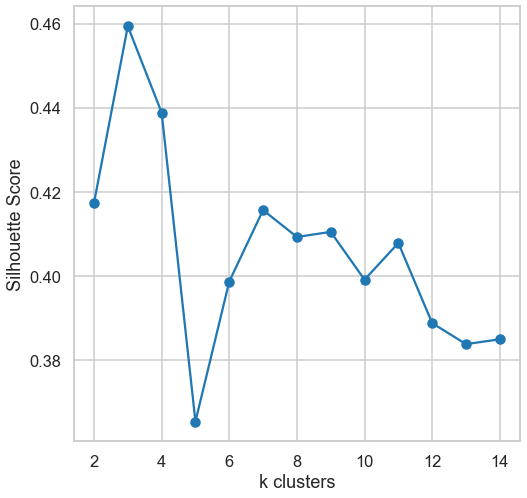

In [98]:
silhouette(new_df)

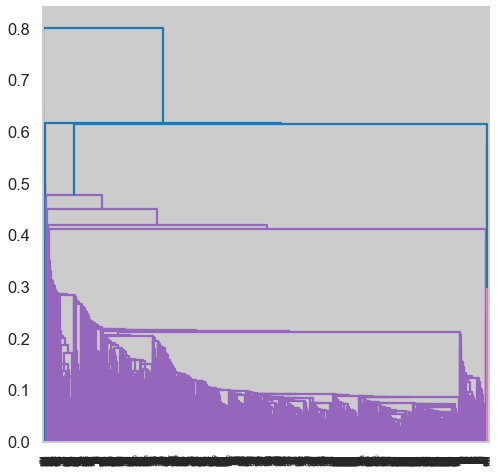

silhouette_score_euclidean=0.3762364071511981


In [99]:
#HIERARCHAL CLUSTERING(After PCA)
#Euclidean, Single(After PCA)

model = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='single')
model.fit(new_df)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(new_df, method='single'))
plt.show()
score = silhouette_score(new_df,model.labels_,metric='euclidean')
print(f'silhouette_score_euclidean={score}')


In [ ]:
#Euclidean, Average(After PCA)

model = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='average')
model.fit(new_df)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(new_df, method='average'))
plt.show()
score = silhouette_score(new_df,model.labels_,metric='euclidean')
print(f'silhouette_score_euclidean={score}')


In [ ]:
#Cosine, Single(After PCA)

model = AgglomerativeClustering(n_clusters=6, affinity='cosine', linkage='single')
model.fit(new_df)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(new_df, method='single'))
plt.show()
score = silhouette_score(new_df,model.labels_,metric='cosine')
print(f'silhouette_score_cosine={score}')


In [ ]:
#Cosine, Average(After PCA)

model = AgglomerativeClustering(n_clusters=6, affinity='cosine', linkage='average')
model.fit(new_df)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(new_df, method='average'))
plt.show()
score = silhouette_score(new_df,model.labels_,metric='cosine')
print(f'silhouette_score_cosine={score}')


In [ ]:
#Manhattan, Single(After PCA)

model = AgglomerativeClustering(n_clusters=6, affinity='manhattan', linkage='single')
model.fit(new_df)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(new_df, method='single'))
plt.show()
score = silhouette_score(new_df,model.labels_,metric='manhattan')
print(f'silhouette_score_manhattan={score}')

In [ ]:
#Manhattan, Average(After PCA)

model = AgglomerativeClustering(n_clusters=6, affinity='manhattan', linkage='average')
model.fit(new_df)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(new_df, method='average'))
plt.show()
score = silhouette_score(new_df,model.labels_,metric='manhattan')
print(f'silhouette_score_manhattan={score}')


In [100]:
#DBSCAN(After PCA)

from sklearn.cluster import DBSCAN
import numpy as np

db = DBSCAN(eps=0.7, min_samples=15)
dbscan=db.fit_predict(new_df)
np.unique(dbscan)


array([-1,  0])

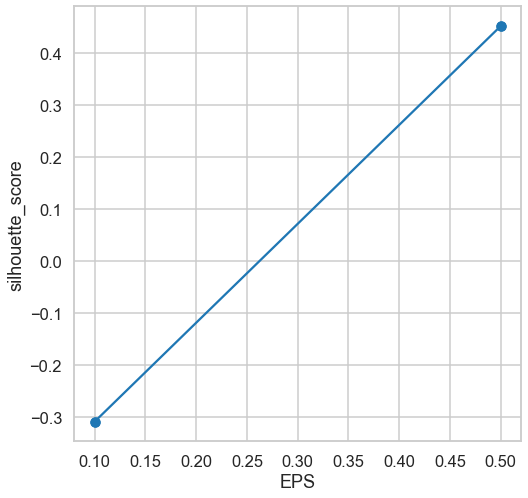

In [101]:
score=[] 
score1=[]
epsfinal=[]
samplesfinal=[]
eps = [0.1, 0.5, 2, 2.7, 3]
min_samples=[5, 10, 15, 20, 25]
for i in eps:
    db = DBSCAN(eps=i, min_samples=15)
    dbscan=db.fit_predict(new_df)
    if(len(np.unique(db.labels_))>1):
        score.append(silhouette_score(new_df,dbscan,metric='euclidean'))
        epsfinal.append(i)
       
    
plt.plot(epsfinal,score, marker='o')
plt.scatter(epsfinal,score)
plt.xlabel('EPS')
plt.ylabel('silhouette_score')
plt.show()

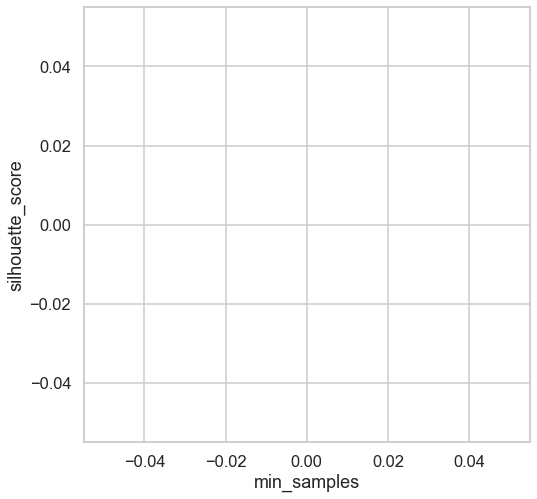

In [102]:
for j in min_samples:
    db = DBSCAN(eps=2, min_samples=j)
    dbscan=db.fit_predict(new_df)
    if(len(np.unique(db.labels_))>1):
        score1.append(silhouette_score(new_df,dbscan,metric='euclidean'))
        samplesfinal.append(j)
        
       
    
plt.plot(samplesfinal,score1, marker='o')
plt.scatter(samplesfinal,score1)
plt.xlabel('min_samples')
plt.ylabel('silhouette_score')
plt.show()

In [105]:
#db = DBSCAN(eps=2, min_samples=20)
#dbscan=db.fit_predict(new_df)
#np.unique(dbscan)
#silhouette_score(new_df,dbscan,metric='euclidean')

In [104]:
#GMM(After PCA)

import pandas as pd
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=6, covariance_type='spherical') #try different types in covariance like full, tied and diag.
fit=gmm.fit_predict(new_df)


score = silhouette_score(new_df,fit,metric='euclidean')
print(score)

0.2822802069430734
